# EXTRAER DATOS DEL ETABS

El codigo proporcionado nos permitirá extrar cualquier tabla que se encuentre en el programa Etabs.

El trabajo de esta será identificar las tablas con las que queremos trabajar y el proceso que se realiza.

## LIBRERIAS

In [13]:
import sys
import os
import comtypes.client
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

## FUNCION PARA CONECTARNOS AL ETABS

Esta funcion se puede usar para cualquier del programa de Etabs que tengas abierto y ejecutado.

In [14]:
def connect_to_etabs():
    helper = comtypes.client.CreateObject('ETABSv1.Helper');
    helper = helper.QueryInterface(comtypes.gen.ETABSv1.cHelper);
    try:
        myETABSObject = helper.GetObject("CSI.ETABS.API.ETABSObject");
        print("Connected to ETABS model");
    except (OSError, comtypes.COMError):
        print("No running instance of the program found or failed to attach.");
        sys.exit(-1);
    SapModel = myETABSObject.SapModel;
    return SapModel,myETABSObject,helper;

SapModel, myETABSObject, helper = connect_to_etabs()

Connected to ETABS model


---

# Trabajando con vigas

Filtrar:
- Nivel 5
- Label Viga  "B16"
- OutputCase :Combinacion de carga ENVOLVENTE
- Maximo
- Minimo valor

In [27]:
start_time = time.time()

ton_m_C = 12   
ret = SapModel.SetPresentUnits(ton_m_C) 

table = SapModel.DatabaseTables.GetTableForDisplayArray("Element Forces - Beams",GroupName="")
cols = table[2]
noOfRows = table[3]
vals = np.array_split(table[4],noOfRows)
df = pd.DataFrame(vals)
df.columns = cols

piso = ["NIVEL 5"]
nombre_viga = ["B16"]
combinacion = ["ENVOLVENTE"]
max = ["Max"]
min = ["Min"]
df = df[df.Story.isin(piso)] 
df = df[df.Beam.isin(nombre_viga)] 
df = df[df.OutputCase.isin(combinacion)] 

df["M3"]= df["M3"].astype(float)
df["Station"]= df["Station"].astype(float)

df1 = df[df.StepType.isin(max)]
df2 = df[df.StepType.isin(min)]

df1 = df1.sort_values(by=['Station'])

end_time = time.time()
elapsed_time = end_time - start_time
print("Tiempo de ejecución: ", round(elapsed_time,2), "segundos")

Tiempo de ejecución:  57.61 segundos


In [28]:
df

,Story,Beam,UniqueName,OutputCase,CaseType,StepType,StepNumber,StepLabel,Station,P,V2,V3,T,M2,M3,Element,ElemStation,Location
132730,NIVEL 5,B16,217,ENVOLVENTE,Combination,Max,None,None,0.0000,0.3537,3.7832,0.034,0.0119,0.0272,14.3268,217-1,0,None
132731,NIVEL 5,B16,217,ENVOLVENTE,Combination,Max,None,None,0.3920,0.3537,4.0247,0.034,0.0119,0.0139,12.7965,217-1,0.392,None
132732,NIVEL 5,B16,217,ENVOLVENTE,Combination,Max,None,None,0.7840,0.3537,4.2662,0.034,0.0119,0.0018,11.1715,217-1,0.784,None
132733,NIVEL 5,B16,217,ENVOLVENTE,Combination,Max,None,None,1.1760,0.3537,4.5077,0.034,0.0119,0.0136,9.4518,217-1,1.176,None
132734,NIVEL 5,B16,217,ENVOLVENTE,Combination,Max,None,None,1.1760,0.1647,4.773,0.0092,0.008,0.0108,9.4597,217-2,0,None
132735,NIVEL 5,B16,217,ENVOLVENTE,Combination,Max,None,None,1.5680,0.1647,5.0145,0.0092,0.008,0.0083,7.5414,217-2,0.392,None
132736,NIVEL 5,B16,217,ENVOLVENTE,Combination,Max,None,None,1.9600,0.1647,5.256,0.0092,0.008,0.006,6.1648,217-2,0.784,None
132737,NIVEL 5,B16,217,ENVOLVENTE,Combination,Max,None,None,2.3520,0.1647,5.4975,0.0092,0.008,0.0055,4.8355,217-2,1.176,None
132738,NIVEL 5,B16,217,ENVOLVENTE,Combination,Max,None,None,2.3520,0.0686,6.0901,0.0082,-1.073E-05,0.0045,4.8389,217-3,0,None
132739,NIVEL 5,B16,217,ENVOLVENTE,Combination,Max,None,None,2.7440,0.0686,6.3316,0.0082,-1.073E-05,0.0028,3.9435,217-3,0.392,None


In [29]:
df1

,Story,Beam,UniqueName,OutputCase,CaseType,StepType,StepNumber,StepLabel,Station,P,V2,V3,T,M2,M3,Element,ElemStation,Location
132730,NIVEL 5,B16,217,ENVOLVENTE,Combination,Max,None,None,0.0000,0.3537,3.7832,0.034,0.0119,0.0272,14.3268,217-1,0,None
132731,NIVEL 5,B16,217,ENVOLVENTE,Combination,Max,None,None,0.3920,0.3537,4.0247,0.034,0.0119,0.0139,12.7965,217-1,0.392,None
132732,NIVEL 5,B16,217,ENVOLVENTE,Combination,Max,None,None,0.7840,0.3537,4.2662,0.034,0.0119,0.0018,11.1715,217-1,0.784,None
132733,NIVEL 5,B16,217,ENVOLVENTE,Combination,Max,None,None,1.1760,0.3537,4.5077,0.034,0.0119,0.0136,9.4518,217-1,1.176,None
132734,NIVEL 5,B16,217,ENVOLVENTE,Combination,Max,None,None,1.1760,0.1647,4.773,0.0092,0.008,0.0108,9.4597,217-2,0,None
132735,NIVEL 5,B16,217,ENVOLVENTE,Combination,Max,None,None,1.5680,0.1647,5.0145,0.0092,0.008,0.0083,7.5414,217-2,0.392,None
132736,NIVEL 5,B16,217,ENVOLVENTE,Combination,Max,None,None,1.9600,0.1647,5.256,0.0092,0.008,0.006,6.1648,217-2,0.784,None
132737,NIVEL 5,B16,217,ENVOLVENTE,Combination,Max,None,None,2.3520,0.1647,5.4975,0.0092,0.008,0.0055,4.8355,217-2,1.176,None
132738,NIVEL 5,B16,217,ENVOLVENTE,Combination,Max,None,None,2.3520,0.0686,6.0901,0.0082,-1.073E-05,0.0045,4.8389,217-3,0,None
132739,NIVEL 5,B16,217,ENVOLVENTE,Combination,Max,None,None,2.7440,0.0686,6.3316,0.0082,-1.073E-05,0.0028,3.9435,217-3,0.392,None


In [30]:
df2

,Story,Beam,UniqueName,OutputCase,CaseType,StepType,StepNumber,StepLabel,Station,P,V2,V3,T,M2,M3,Element,ElemStation,Location
132749,NIVEL 5,B16,217,ENVOLVENTE,Combination,Min,None,None,0.0000,-0.3155,-12.9259,-0.0364,0.0027,-0.0293,-26.3587,217-1,0,None
132750,NIVEL 5,B16,217,ENVOLVENTE,Combination,Min,None,None,0.3920,-0.3155,-12.5905,-0.0364,0.0027,-0.0151,-21.3575,217-1,0.392,None
132751,NIVEL 5,B16,217,ENVOLVENTE,Combination,Min,None,None,0.7840,-0.3155,-12.2551,-0.0364,0.0027,-0.0021,-16.4878,217-1,0.784,None
132752,NIVEL 5,B16,217,ENVOLVENTE,Combination,Min,None,None,1.1760,-0.3155,-11.9197,-0.0364,0.0027,-0.0129,-11.7495,217-1,1.176,None
132753,NIVEL 5,B16,217,ENVOLVENTE,Combination,Min,None,None,1.1760,-0.1592,-11.0708,-0.0068,0.0021,-0.0084,-11.7120,217-2,0,None
132754,NIVEL 5,B16,217,ENVOLVENTE,Combination,Min,None,None,1.5680,-0.1592,-10.7354,-0.0068,0.0021,-0.0068,-7.4380,217-2,0.392,None
132755,NIVEL 5,B16,217,ENVOLVENTE,Combination,Min,None,None,1.9600,-0.1592,-10.4,-0.0068,0.0021,-0.0055,-3.9319,217-2,0.784,None
132756,NIVEL 5,B16,217,ENVOLVENTE,Combination,Min,None,None,2.3520,-0.1592,-10.0646,-0.0068,0.0021,-0.0059,-0.6992,217-2,1.176,None
132757,NIVEL 5,B16,217,ENVOLVENTE,Combination,Min,None,None,2.3520,-0.0762,-8.2758,-0.0079,-0.0012,-0.0045,-0.6929,217-3,0,None
132758,NIVEL 5,B16,217,ENVOLVENTE,Combination,Min,None,None,2.7440,-0.0762,-7.9404,-0.0079,-0.0012,-0.003,0.9851,217-3,0.392,None


In [35]:
Mis = df1.iloc[0,14]
Mii = df2.iloc[0,14]
Mds = df1.iloc[-1,14]
Mdi = df2.iloc[-1,14]
L = df2["Station"].max()

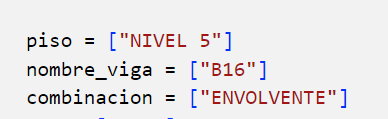

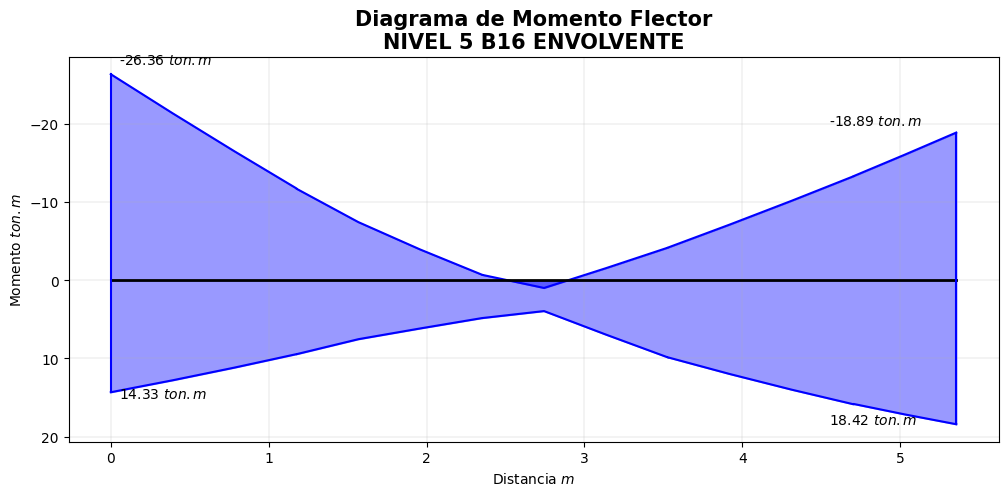

In [73]:
plt.figure(figsize=(12,5))
plt.plot(df1["Station"].values,df1["M3"].values,"b")        # plotear maximo
plt.plot(df2["Station"].values,df2["M3"].values,"b")        # plotear minimo
plt.plot([0,L],[0,0],"k", lw = 2)                                   # plotear eje de la viga
plt.plot([0,0],[Mis,Mii], "b")
plt.plot([L,L],[Mds,Mdi], "b")
plt.title("Diagrama de Momento Flector"+"\n"+piso[0]+" "+nombre_viga[0]+" "+combinacion[0], fontsize=15, fontweight="bold")
plt.xlabel("Distancia $m$")
plt.ylabel("Momento $ton.m$")
#anotaciones
plt.annotate(str(round(Mis,2))+" $ton.m$",xy=(0,Mis), xytext=(0.05,1.05*Mis))
plt.annotate(str(round(Mds,2))+" $ton.m$",xy=(L,Mds), xytext=(0.85*L,Mds))
plt.annotate(str(round(Mii,2))+" $ton.m$",xy=(0,Mii), xytext=(0.05,1.05*Mii))
plt.annotate(str(round(Mdi,2))+" $ton.m$",xy=(L,Mdi), xytext=(0.85*L,1.05*Mdi))
plt.gca().invert_yaxis()
plt.grid( linestyle='-', linewidth=0.2)

# achurar area de la grafica
plt.fill_between(df1["Station"].values,df1["M3"].values,0,color="blue",alpha=0.4)
plt.fill_between(df2["Station"].values,df2["M3"].values,0,color="blue",alpha=0.4)

plt.savefig("M3.svg",dpi=1080, bbox_inches='tight')

plt.show()

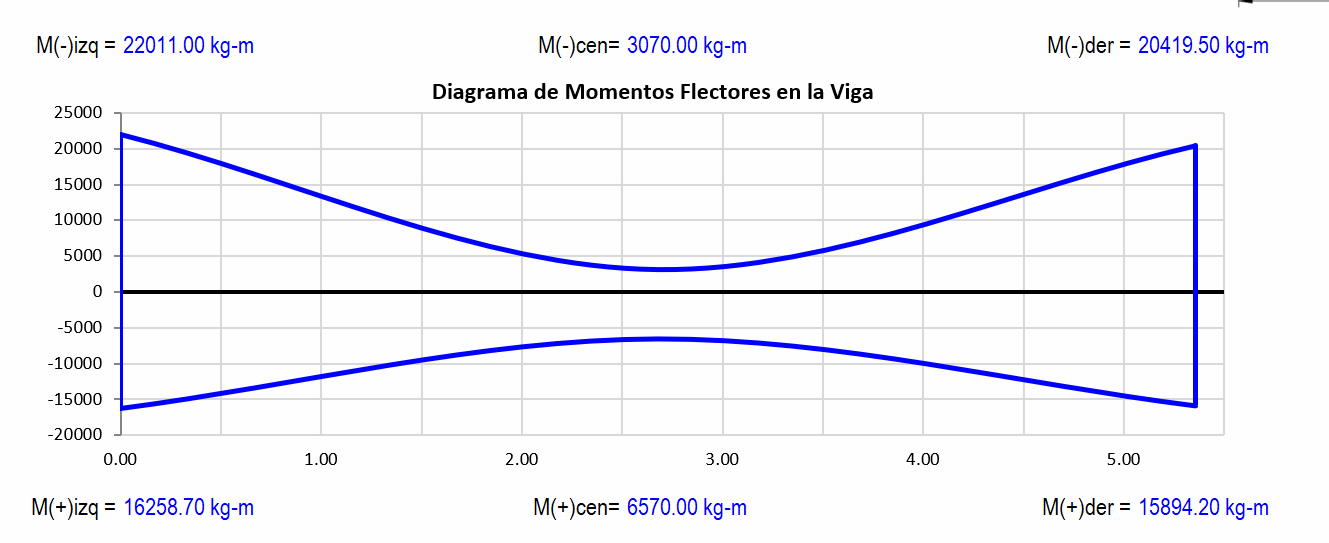

Celdas a conectar:
- D26 : Mis
- D37 : Mii
- L26 : Mds
- L37 : Mdi

In [56]:
from openpyxl import load_workbook
name = "diseño_viga.xlsx"

wb = load_workbook(name)
sheet = wb.active

sheet["D26"] = Mis*1000
sheet["D37"] = Mii*1000*-1
sheet["L26"] = Mds*1000
sheet["L37"] = Mdi*1000*-1
sheet["D24"] = L

wb.save(name)

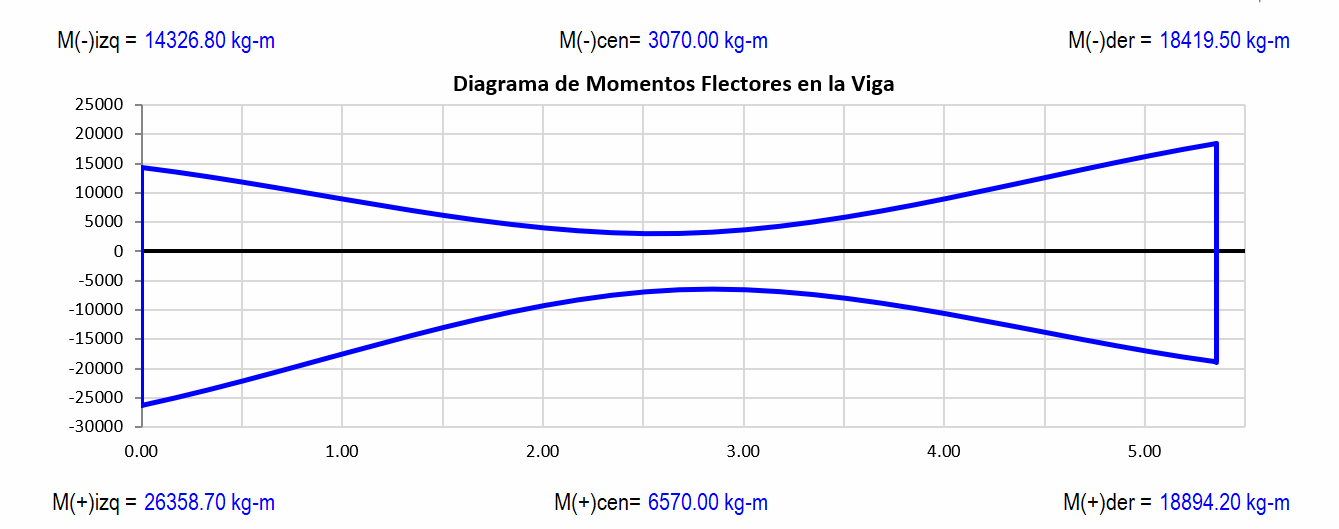